# Iris

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, levene, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# 1. 데이터 불러오기 및 구조 확인
iris = sns.load_dataset('iris')
iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# 2. 기술통계량
grouped = iris.groupby('species')['petal_length']
print(grouped.describe())
print("\nGroup sizes:\n", iris['species'].value_counts())

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

Group sizes:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


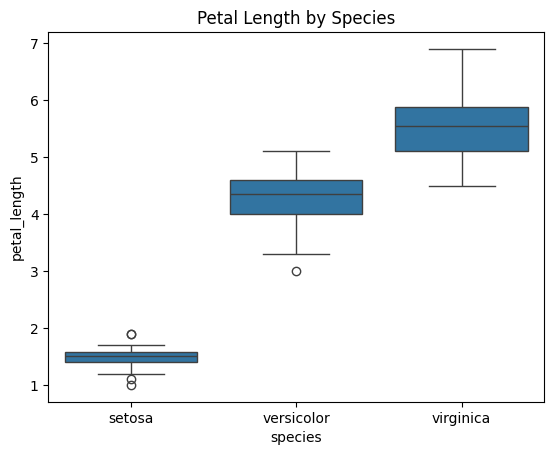

In [ ]:
# 3. Boxplot
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length by Species')
plt.show()



In [ ]:
# 4. 정규성 검증
for species in iris['species'].unique():
    stat, p = shapiro(iris[iris['species'] == species]['petal_length'])
    print(f"{species} 정규성 p-value: {p:.4f}")

setosa 정규성 p-value: 0.0548
versicolor 정규성 p-value: 0.1585
virginica 정규성 p-value: 0.1098


In [ ]:
#5. 등분산성 검정
stat, p = levene(
    iris[iris['species'] == 'setosa']['petal_length'],
    iris[iris['species'] == 'versicolor']['petal_length'],
    iris[iris['species'] == 'virginica']['petal_length']
)
print(f"등분산성 p-value: {p:.10f}")


등분산성 p-value: 0.0000000313


In [17]:
# 6. 가설
print("H0: 세 종의 평균 Petal Length는 같다.")
print("H1: 적어도 하나의 그룹 평균은 다르다.")

# 7. ANOVA
f_stat, p_val = f_oneway(
    iris[iris['species'] == 'setosa']['petal_length'],
    iris[iris['species'] == 'versicolor']['petal_length'],
    iris[iris['species'] == 'virginica']['petal_length']
)
print(f"ANOVA 결과 - F: {f_stat:.10f}, p: {p_val:.10f}")

H0: 세 종의 평균 Petal Length는 같다.
H1: 적어도 하나의 그룹 평균은 다르다.
ANOVA 결과 - F: 1180.1611822530, p: 0.0000000000


In [18]:
# 8. 사후검정
tukey = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey)

# 9. 결론
print("=> Virginica > Versicolor > Setosa 순으로 평균적으로 유의한 차이가 있다.")

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------
=> Virginica > Versicolor > Setosa 순으로 평균적으로 유의한 차이가 있다.


# Credit Card Fraud

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve

In [12]:
# 1. 데이터 로드
df = pd.read_csv('/Users/eomjoonseo/ybigta/0715/creditcard.csv')
print(df['Class'].value_counts())
print(df.head(10))


# 2. 샘플링
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)
df_sampled = pd.concat([fraud, normal])
print(df_sampled['Class'].value_counts(normalize=True))

Class
0    284315
1       492
Name: count, dtype: int64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22      

In [13]:
# 3. 전처리
scaler = StandardScaler()
df_sampled['Amount_Scaled'] = scaler.fit_transform(df_sampled[['Amount']])
df_sampled.drop(columns=['Amount'], inplace = True)


X = df_sampled.drop(columns=['Class'])
y = df_sampled['Class']


In [14]:
# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Train class ratio:", y_train.value_counts(normalize=True))



Train class ratio: Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용 전 클래스 분포 확인
print("✅ SMOTE 적용 전 클래스 분포 (학습 데이터 기준):")
print(y_train.value_counts())

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# SMOTE 적용 후 클래스 분포 확인
print("\n✅ SMOTE 적용 후 클래스 분포:")
print(y_train_resampled.value_counts())

✅ SMOTE 적용 전 클래스 분포 (학습 데이터 기준):
Class
0    7999
1     394
Name: count, dtype: int64

✅ SMOTE 적용 후 클래스 분포:
Class
0    7999
1    7999
Name: count, dtype: int64


In [22]:
# 6. 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [23]:
# 7. 성능 평가
print(classification_report(y_test, y_pred))
print(f"PR-AUC: {average_precision_score(y_test, y_proba):.4f}")
print("목표 달성 여부:")
print("- Recall ≥ 0.80?", recall := classification_report(y_test, y_pred, output_dict=True)['1']['recall'] >= 0.80)
print("- F1 ≥ 0.88?", f1 := classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'] >= 0.88)
print("- PR-AUC ≥ 0.90?", average_precision_score(y_test, y_proba) >= 0.90)



              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       0.95      0.89      0.92        98

    accuracy                           0.99      2099
   macro avg       0.97      0.94      0.96      2099
weighted avg       0.99      0.99      0.99      2099

PR-AUC: 0.9537
목표 달성 여부:
- Recall ≥ 0.80? True
- F1 ≥ 0.88? True
- PR-AUC ≥ 0.90? True
